In [1]:
import csv
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_list(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return lst

In [3]:
def find_ranks(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))

In [4]:
def funReadData(path):
    df = pd.read_csv(path, encoding = 'ISO-8859-1')
    return df

In [5]:
#defining filedirectory
fileDir = os.path.dirname(os.path.realpath('__file__'))

In [6]:
#defining data frames
df = pd.DataFrame()

In [7]:
#reading loan data stats
for directory, subdirectory, filenames in  os.walk(fileDir + '/data/processed_data/'):
    for filename in filenames:
        if filename == 'purchase_data.csv':
            df = funReadData(os.path.join(directory, filename))

In [8]:
# columns = ['shopping_pt', 'record_type', 'day', 'state', 'location', 'group_size', 'homeowner', 'car_age', 'car_value', 'risk_factor', 'age_oldest', 'age_youngest', 'married_couple', 'C_previous', 'duration_previous', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'cost', 'plan', 'hour', 'is_weekend', 'is_family', 'agediff', 'is_individual', 'state_code', 'car_value_code', 'is_changed']

In [9]:
#defining required columns
columns = ['location', 'group_size', 'homeowner', 'car_age', 'risk_factor', 'age_oldest', 'age_youngest', 
           'married_couple', 'C_previous', 'duration_previous', 'A', 'hour', 'is_weekend', 'is_family', 
           'agediff', 'is_individual', 'state_code', 'car_value_code', 'B', 'C', 'D', 'E', 'F', 'G']

In [10]:
#subsetting data frame
df = df[columns]

In [11]:
#columns to be converted to categories
columns = ['location', 'group_size', 'homeowner', 'risk_factor', 'married_couple', 'C_previous','state_code', 'car_value_code',
          'hour', 'is_weekend', 'is_family', 'is_individual', 'A', 'B', 'C', 'D', 'E', 'F', 'G']

In [12]:
#change data type to category
for col in columns:
    df[col] = df[col].astype('category')

# Divide into test and train data

In [13]:
#copy data frame
df_copy = df.copy()

In [14]:
#dividing the DF into two for test & train data
from sklearn.model_selection import train_test_split
train_risk, test_risk = train_test_split(df_copy, test_size = 0.3)

In [15]:
#inputs required for classification
train_y = train_risk['G']
train_X = train_risk.drop(['G'], axis = 1)

test_y = test_risk['G']
test_X = test_risk.drop(['G'], axis = 1)

# Random Forest 

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib as mlp
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [17]:
#defining the model
model = RandomForestClassifier(n_estimators = 10)

In [18]:
#training the train_X data on the model
model = model.fit(train_X,train_y)

In [19]:
#predecting 'LoanApproval' for train_X & test_X data
train_y_predicted = model.predict(train_X)
test_y_predicted = model.predict(test_X)

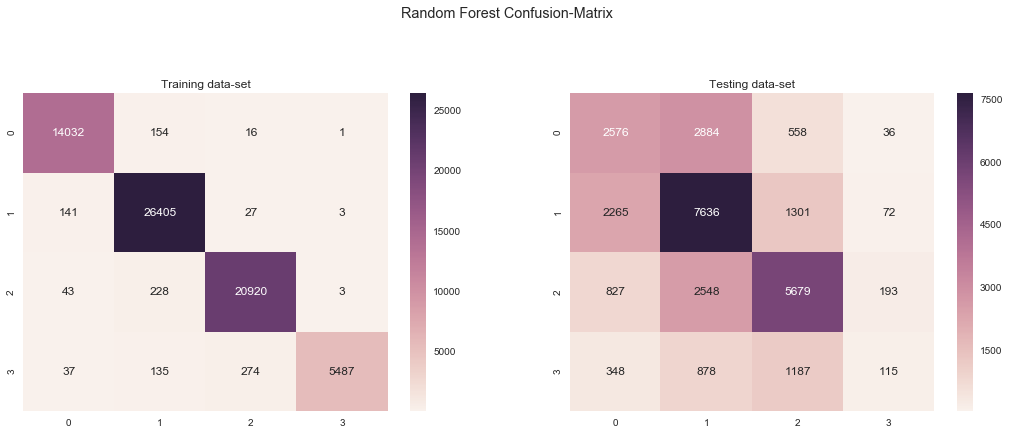

In [20]:
#preparing Confusion-matrix for train_X & test_X data
random_forest_conf_matrix_train = metrics.confusion_matrix(train_y, train_y_predicted)
random_forest_conf_matrix_test = metrics.confusion_matrix(test_y, test_y_predicted)

#plot on Confusion-matrix heatmap
fix, ax = plt.subplots(figsize=(16, 12))
plt.suptitle('Random Forest Confusion-Matrix')
plt.subplot(2, 2, 1)
plt.title('Training data-set');
sns.heatmap(random_forest_conf_matrix_train, annot=True,  fmt='d');

plt.subplot(2, 2, 2)
plt.title('Testing data-set');
sns.heatmap(random_forest_conf_matrix_test, annot=True,  fmt='d');

plt.show()

In [21]:
#calculating accuracy score
random_forest_acc_matrix_train = metrics.accuracy_score(train_y, train_y_predicted)
random_forest_acc_matrix_test = metrics.accuracy_score(test_y, test_y_predicted)
print('Random Forest accuracy')
print('Training data : ',random_forest_acc_matrix_train)
print('Testing data : ',random_forest_acc_matrix_test)

Random Forest accuracy
Training data :  0.984360733956
Testing data :  0.549977665533


In [22]:
#generating classification report
print('Random Forest classification reprot')

random_forest_class_report_train = metrics.classification_report(train_y, train_y_predicted)
print('Training data')
print(random_forest_class_report_train)

random_forest_class_report_test = metrics.classification_report(test_y, test_y_predicted)
print('Testing data')
print(random_forest_class_report_test)

Random Forest classification reprot
Training data
             precision    recall  f1-score   support

          1       0.98      0.99      0.99     14203
          2       0.98      0.99      0.99     26576
          3       0.99      0.99      0.99     21194
          4       1.00      0.92      0.96      5933

avg / total       0.98      0.98      0.98     67906

Testing data
             precision    recall  f1-score   support

          1       0.43      0.43      0.43      6054
          2       0.55      0.68      0.61     11274
          3       0.65      0.61      0.63      9247
          4       0.28      0.05      0.08      2528

avg / total       0.53      0.55      0.53     29103



# Testing Feature  Selection

In [23]:
list(zip(train_X, model.feature_importances_))

[('location', 0.10863255926871465),
 ('group_size', 0.0098459805662842285),
 ('homeowner', 0.017206797915156918),
 ('car_age', 0.076060623440957084),
 ('risk_factor', 0.033379790978827581),
 ('age_oldest', 0.076028237184503439),
 ('age_youngest', 0.076071584887510091),
 ('married_couple', 0.0089816029637894146),
 ('C_previous', 0.030847141658427141),
 ('duration_previous', 0.068176930941120553),
 ('A', 0.01945592038320567),
 ('hour', 0.06897210980120809),
 ('is_weekend', 0.017439415899279345),
 ('is_family', 0.00094331464000306476),
 ('agediff', 0.024472246537158737),
 ('is_individual', 0.0087045909809915917),
 ('state_code', 0.18713665785666117),
 ('car_value_code', 0.048833097190996502),
 ('B', 0.018849833639505043),
 ('C', 0.028178466006336122),
 ('D', 0.017693542455482374),
 ('E', 0.012532333901910822),
 ('F', 0.041557220901970324)]

In [24]:
from sklearn.feature_selection import SelectFromModel

In [25]:
sfm = SelectFromModel(model, threshold=0.02)

# Train the selector
sfm.fit(train_X, train_y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
        prefit=False, threshold=0.02)

In [26]:
labels = ['location', 'group_size', 'homeowner', 'car_age', 'risk_factor', 'age_oldest', 'age_youngest', 
           'married_couple', 'C_previous', 'duration_previous', 'hour', 'is_weekend', 'is_family', 
           'agediff', 'is_individual', 'state_code', 'car_value_code', 'B', 'C', 'D', 'E', 'F', 'G']

In [27]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(labels[feature_list_index])   

location
car_age
risk_factor
age_oldest
age_youngest
C_previous
duration_previous
is_weekend
is_individual
car_value_code
B
D
G


In [28]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(train_X)
X_important_test = sfm.transform(test_X)

In [29]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
model = clf_important.fit(X_important_train, train_y)

In [30]:
#predecting 'LoanApproval' for train_X & test_X data
train_y_predicted = model.predict(X_important_train)
test_y_predicted = model.predict(X_important_test)

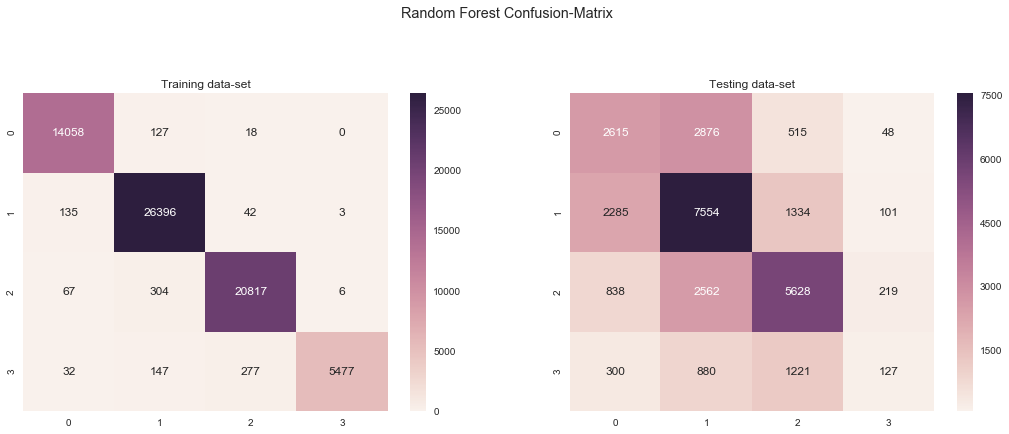

In [31]:
#preparing Confusion-matrix for train_X & test_X data
random_forest_conf_matrix_train = metrics.confusion_matrix(train_y, train_y_predicted)
random_forest_conf_matrix_test = metrics.confusion_matrix(test_y, test_y_predicted)

#plot on Confusion-matrix heatmap
fix, ax = plt.subplots(figsize=(16, 12))
plt.suptitle('Random Forest Confusion-Matrix')
plt.subplot(2, 2, 1)
plt.title('Training data-set');
sns.heatmap(random_forest_conf_matrix_train, annot=True,  fmt='d');

plt.subplot(2, 2, 2)
plt.title('Testing data-set');
sns.heatmap(random_forest_conf_matrix_test, annot=True,  fmt='d');

plt.show()

In [32]:
#calculating accuracy score
random_forest_acc_matrix_train = metrics.accuracy_score(train_y, train_y_predicted)
random_forest_acc_matrix_test = metrics.accuracy_score(test_y, test_y_predicted)
print('Random Forest accuracy')
print('Training data : ',random_forest_acc_matrix_train)
print('Testing data : ',random_forest_acc_matrix_test)

Random Forest accuracy
Training data :  0.982947014991
Testing data :  0.547160086589


In [33]:
#generating classification report
print('Random Forest classification reprot')

random_forest_class_report_train = metrics.classification_report(train_y, train_y_predicted)
print('Training data')
print(random_forest_class_report_train)

random_forest_class_report_test = metrics.classification_report(test_y, test_y_predicted)
print('Testing data')
print(random_forest_class_report_test)

Random Forest classification reprot
Training data
             precision    recall  f1-score   support

          1       0.98      0.99      0.99     14203
          2       0.98      0.99      0.99     26576
          3       0.98      0.98      0.98     21194
          4       1.00      0.92      0.96      5933

avg / total       0.98      0.98      0.98     67906

Testing data
             precision    recall  f1-score   support

          1       0.43      0.43      0.43      6054
          2       0.54      0.67      0.60     11274
          3       0.65      0.61      0.63      9247
          4       0.26      0.05      0.08      2528

avg / total       0.53      0.55      0.53     29103

